<a href="https://colab.research.google.com/github/rajeev2226/Jamboree_Admission_Linear_Regression/blob/main/Jamboree_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#             ---JAMBOREE STUDY CASE STUDY---

About

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-
solving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to

their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission
from an Indian perspective.
Column Profiling:
1. Serial No. (Unique row ID)
2. GRE Scores (out of 340)
3. TOEFL Scores (out of 120)
4. University Rating (out of 5)
5. Statement of Purpose and Letter of Recommendation Strength (out of 5)
6. Undergraduate GPA (out of 10)
7. Research Experience (either 0 or 1)
8. Chance of Admit (ranging from 0 to 1)

In [3]:
! pip install scikit-learn

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [7]:
jb = pd.read_csv('Jamboree_Admission.csv')
jb.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [9]:
jb.drop(columns='Serial No.', axis=1, inplace=True)

In [10]:
jb.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


### In this dataset there is no null values.

### Lets find out no of unique features.

In [11]:
jb.nunique()

,0
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


In [12]:
jb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [13]:
jb.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
jb.cov()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,127.580377,56.825026,8.206605,6.867206,5.484521,5.641944,3.162004,1.291862
TOEFL Score,56.825026,36.989114,4.519150,3.883960,3.048168,2.981607,1.411303,0.680046
University Rating,8.206605,4.519150,1.307619,0.825014,0.644112,0.487761,0.242645,0.111384
SOP,6.867206,3.883960,0.825014,0.982088,0.608701,0.426845,0.200962,0.095691
LOR,5.484521,3.048168,0.644112,0.608701,0.856457,0.356807,0.171303,0.084296
CGPA,5.641944,2.981607,0.487761,0.426845,0.356807,0.365799,0.150655,0.075326
Research,3.162004,1.411303,0.242645,0.200962,0.171303,0.150655,0.246894,0.038282
Chance of Admit,1.291862,0.680046,0.111384,0.095691,0.084296,0.075326,0.038282,0.019921


In [15]:
jb.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


### This is the case of Multicolliearity

## Univariate Analysis

In [16]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit '

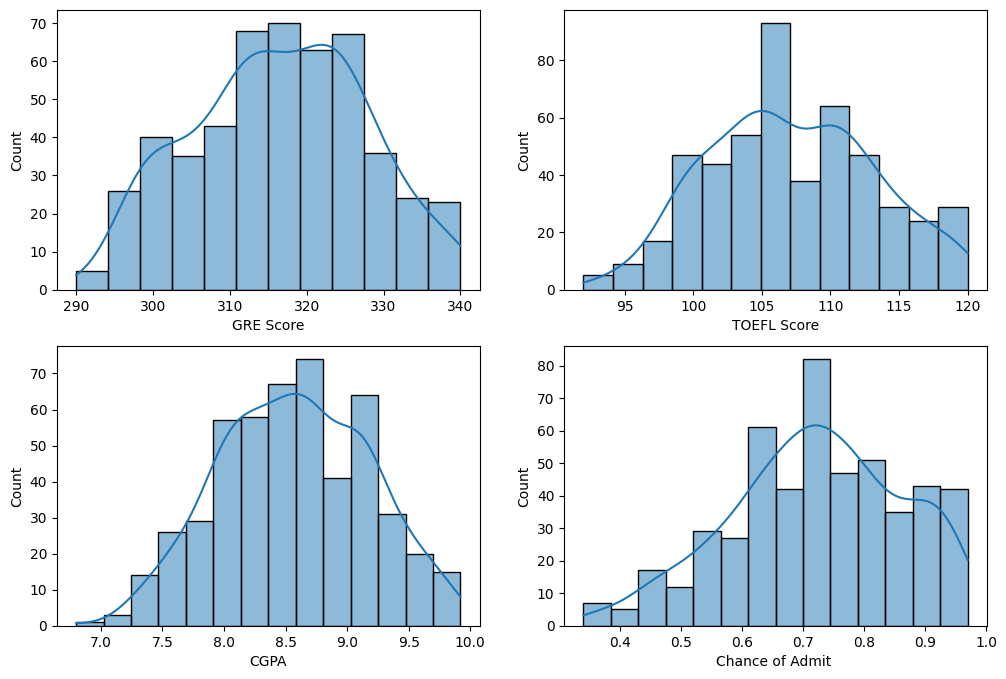

In [17]:
# check distribution of each numerical variable
rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(jb[num_cols[index]], kde=True, ax=axs[row,col])
        index += 1
    break

sns.histplot(jb[num_cols[-1]], kde=True, ax=axs[1,0])
sns.histplot(jb[target], kde=True, ax=axs[1,1])
plt.show()

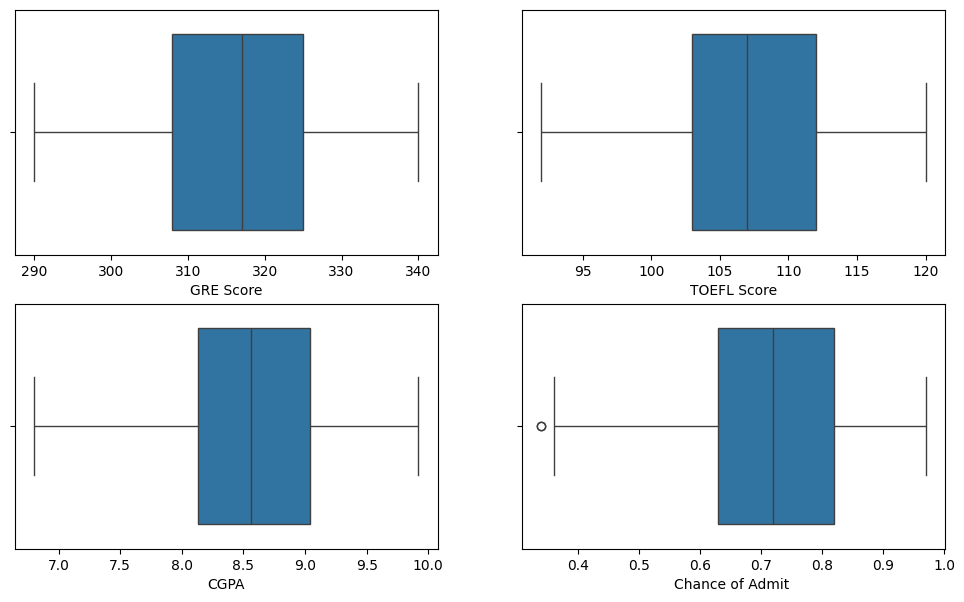

In [20]:
# check for outliers using boxplots
rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))

index = 0
for col in range(cols):
    sns.boxplot(x=num_cols[index], data=jb, ax=axs[0,index])
    index += 1

sns.boxplot(x=num_cols[-1], data=jb, ax=axs[1,0])
sns.boxplot(x=target, data=jb, ax=axs[1,1])
plt.show()

In [21]:
# check unique values in categorical variables
for col in cat_cols:
    print("Column:  {:18}   Unique values: {}".format(col, jb[col].nunique()))

Column:  University Rating    Unique values: 5
Column:  SOP                  Unique values: 9
Column:  LOR                  Unique values: 9
Column:  Research             Unique values: 2


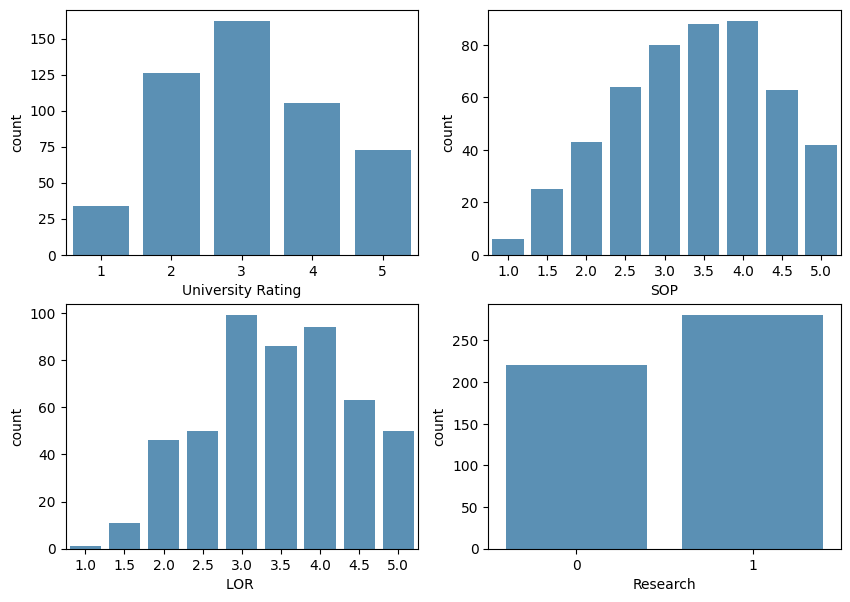

In [23]:
# countplots for categorical variables
cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=jb, ax=axs[row, col], alpha=0.8)
        index += 1

plt.show()

## Bivariate analysis

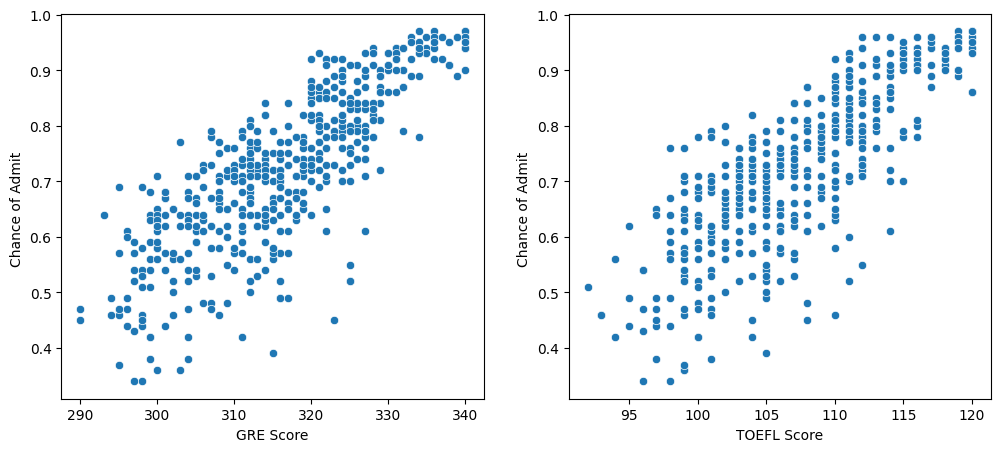

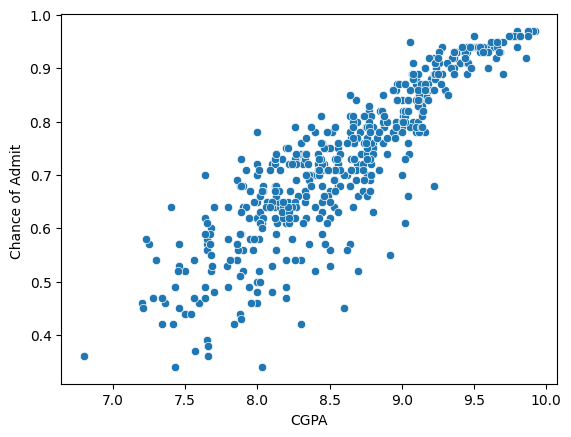

In [24]:
# check relation bw continuous variables & target variable
fig, axs = plt.subplots(1, 2, figsize=(12,5))

sns.scatterplot(x=num_cols[0], y=target, data=jb, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target, data=jb, ax=axs[1])
plt.show()
sns.scatterplot(x=num_cols[2], y=target, data=jb)
plt.show()

### Seems like there is a linear correlation between the continuous variables and the target variable.

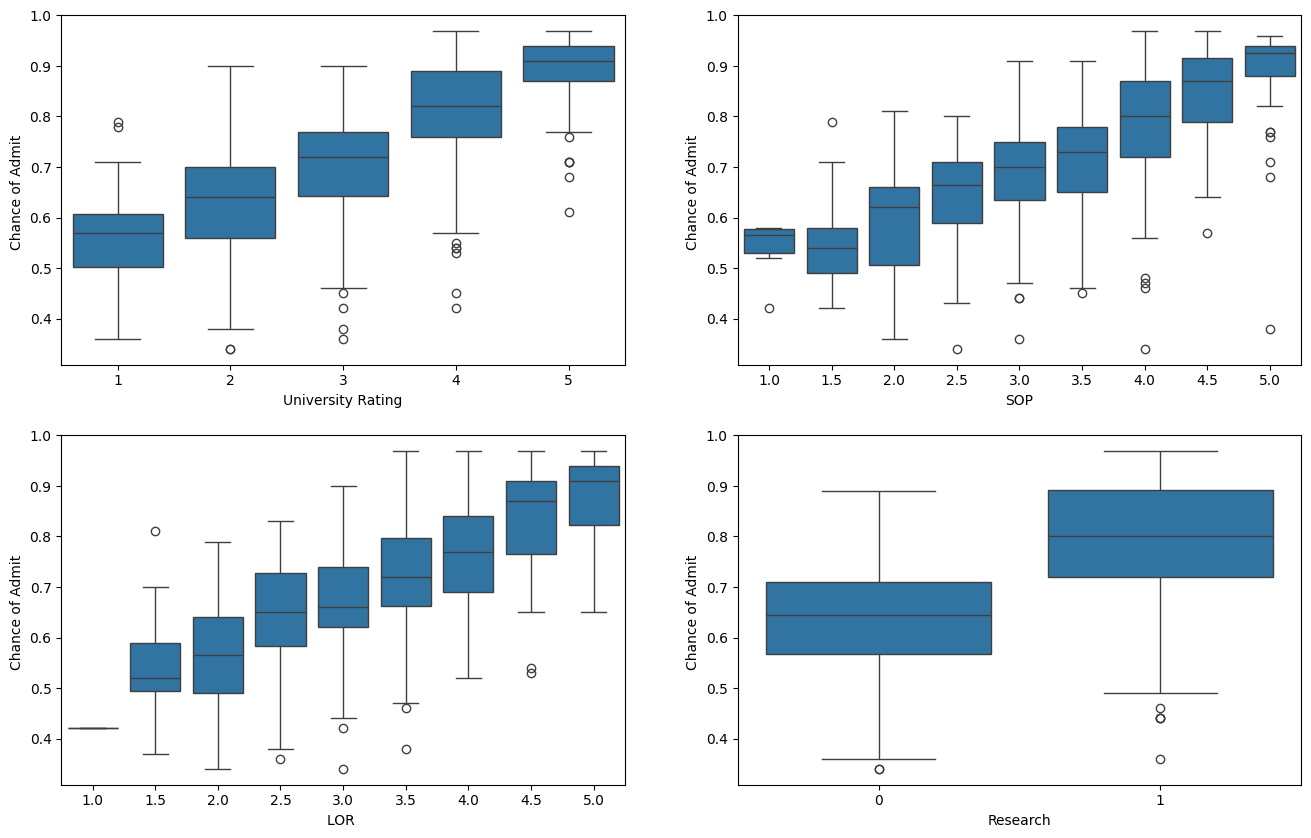

In [25]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=jb, ax=axs[row,col])
        index += 1

- As you can see from the graphs, as tge rating increases the Chance of Admit also increases.
- Students who have the research experience have more chances of Admin as compared to other students who don't have the research experience.

## Multivariate Aalysis

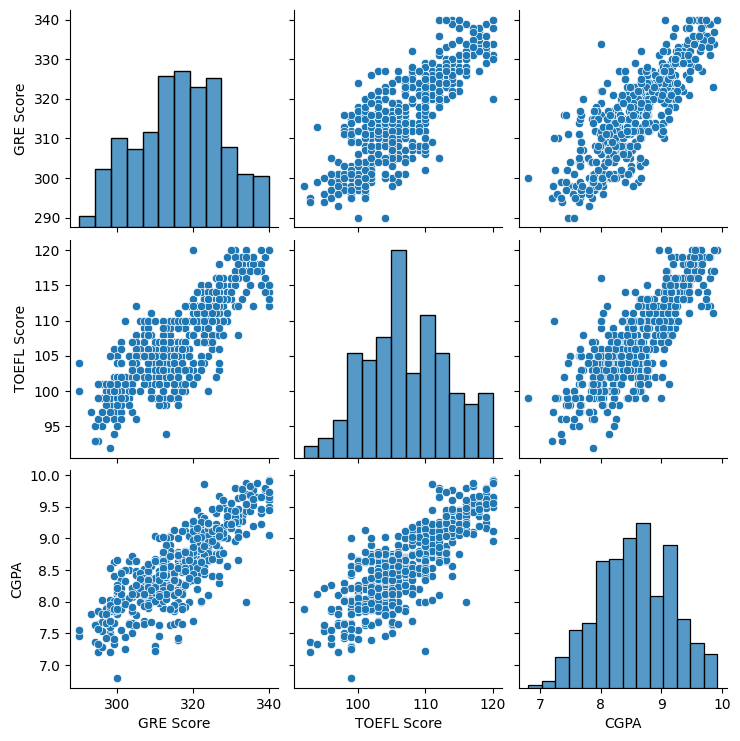

In [27]:
sns.pairplot(jb[num_cols])
plt.show()

## Independent continuous variables are also correlated with each other.

In [28]:
jb.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


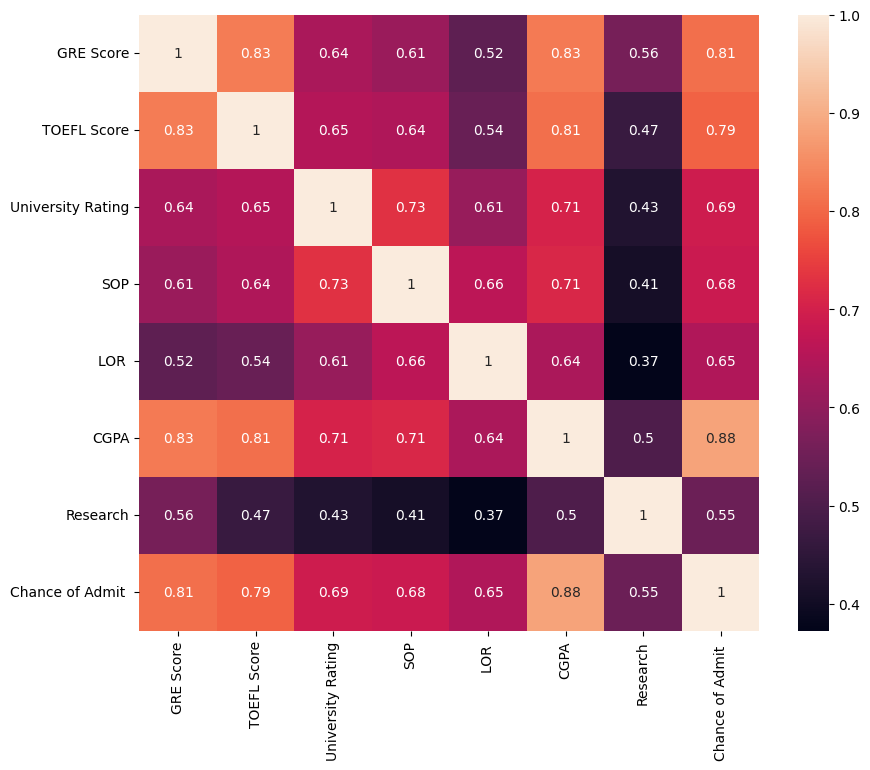

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(jb.corr(), annot=True)
plt.show()

## Data Preprocessing

In [31]:
# check for duplicates
jb.duplicated().sum()

0

There are no missing values, outliers and duplicates present in the dataset. Dataset is very clean.

## Data Modeling

In [33]:
X = jb.drop(columns=[target])
y = jb[target]

In [34]:
# standardize the dataset
sc = StandardScaler()
X = sc.fit_transform(X)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [40]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(400, 7) (400,)
(100, 7) (100,)


## Model Building

## Linear Regression

In [41]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

## R2 Score on Train Data

In [43]:
r2=r2_score(y_train,y_pred_train)
print("r2 score-> ",r2)
lr=lr_model.score(x_train,y_train)
print("lr score-> ",lr)

r2 score->  0.8215099192361265
lr score->  0.8215099192361265


## R2 Score on Test Data

In [44]:
r2_score(y_test,y_pred_test)
print("r2 score-> ",r2)
lr=lr_model.score(x_test,y_test)
print("lr score-> ",lr)

r2 score->  0.8215099192361265
lr score->  0.8208741703103732


## All Features Cofficients and features

In [45]:
lr_model_weights = pd.DataFrame(lr_model.coef_.reshape(1,-1),columns=jb.columns[:-1])
lr_model_weights["Intercept"] = lr_model.intercept_
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


## Insights

- GRE,CGPA and TOEFL have high weights.
- University rating,SOP,LOR,Research have low weights.

In [51]:
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MSE = np.round(mean_squared_error(y_true= y_actual,y_pred = y_forecast,squared=True),2)
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"MSE: {MSE}\nMAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [52]:
model_evaluation(y_train.values, y_pred_train, lr_model)

MSE: 0.0
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82


In [53]:
model_evaluation(y_test.values, y_pred_test, lr_model)

MSE: 0.0
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81


## Linear Regression using OLS

In [54]:
new_x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, new_x_train)
results = model.fit()
# statstical summary of the

In [55]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Sat, 14 Sep 2024   Prob (F-statistic):          2.10e-142
Time:                        11:22:28   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7229      0.003    238.468      0.0

## Testing Assumptions of Linear Regression Model

1. No multicolinearity:
Multicollinearity check by VIF(Variance Inflation Factor) score.
Variables are dropped one-by-one till none has a VIF>5.
2. Mean of Residuals should be close to zero.
3. Linear relationship between independent & dependent variables.
This can be checked using the following methods:
Scatter plots
Regression plots
Pearson Correlation
4. Test for Homoscedasticity
Create a scatterplot of residuals against predicted values.

Perform a Goldfeld-Quandt test to check the presence of
Heteroscedasticity in the data.
- If the obtained `p-value > 0.05`, there is no strong evidence of heteroscedasticity.

5. Normality of Residuals
Almost bell-shaped curve in residuals distribution.
6. Impact of Outliers
Multicolinearity check:
VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis.
It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.
The formula for VIF is as follows:
VIF(j) = 1 / (1 - R(j)^2)
Where:
j represents the jth predictor variable.
R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor
variables.
"
Calculate the VIF for each variable.
Identify variables with VIF greater than 5.
Drop the variable with the highest VIF.
Repeat steps 1-3 until no variable has a VIF greater than 5.

In [60]:
vif = pd.DataFrame()
vif["Features"] = jb.columns[:-1]
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif


,Features,VIF
0,GRE Score,4.464249
1,TOEFL Score,3.904213
2,University Rating,2.621036
3,SOP,2.835210
4,LOR,2.033555
5,CGPA,4.777992
6,Research,1.494008


## Insight
- As the Variance Inflation Factor(VIF) score is less than 5 for all the features we can say that there is no much multicolinearity
between the features.

## Mean Of Residuals

1. If mean of residuals is significantly non-zero, then the model is overestimating or underestimating the observed values.
2. If the mean of residuals is close to zero then on average predections made by linear regression model are accurate, within the equal
balance of overestimating and underestimating. This is the desired charecteristics for well-fitted regression model.

In [61]:
residual = y_test.values - y_pred_test

In [62]:
residual_train = y_train.values - y_pred_train
residual_train.mean()

0.0

In [63]:
residual.mean()

-0.005706590389232241

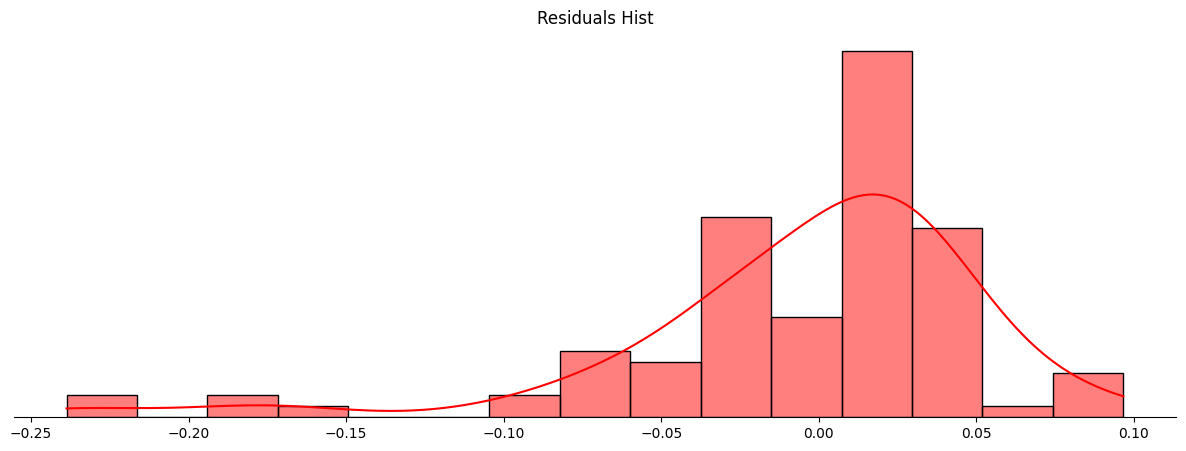

In [64]:
plt.figure(figsize=(15,5))
sns.histplot(residual, kde= True,color='r')
plt.title('Residuals Hist')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

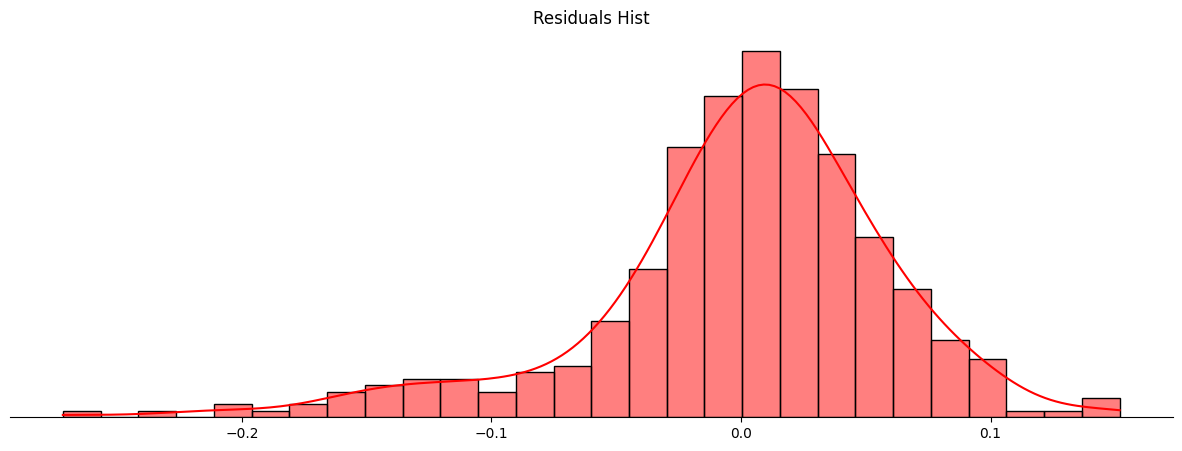

In [65]:
plt.figure(figsize=(15,5))
sns.histplot(residual_train, kde= True,color='r')
plt.title('Residuals Hist')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

## Insight
The mean of residual is close to zero, therefore our model is unbiased

## Linear Relationship

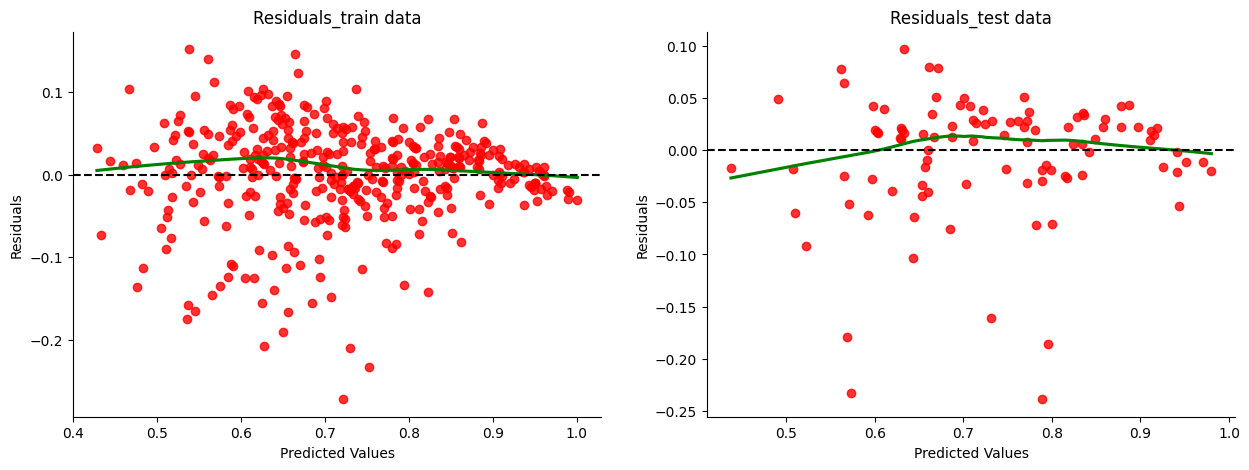

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Residuals_train data')
sns.regplot(x=y_pred_train, y=residual_train, lowess=True, color='r',line_kws={'color': 'green'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.subplot(122)
plt.title('Residuals_test data')
sns.regplot(x=y_pred_test, y=residual, lowess=True,color='r' ,line_kws={'color': 'green'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
sns.despine()

## Insight
1. From the Joint plot & pairplot in the graphical analysis, we can say that there is linear relationship between dependent variable and
independent variables.

## Homoscedacity

In [72]:
ols_model = results
predicted = ols_model.predict()
residuals = ols_model.resid

## Breusch-Pagan test for Homoscedasticity

Null Hypothesis -- H0 : Homoscedasticity is present in residuals.
Alternate Hypothesis -- Ha : Heteroscedasticity is present in residuals.
alpha : 0.05

## Insights
- Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can
conclude that Homoscedasticity is met.
- Since the p-value is much lower than the alpha value, we can Reject the null hypothesis and conclude that *Heteroscedasticity is
present*
- Since the p-value is significantly less than the conventional significance level (e.g., 0.05), we reject the null hypothesis of
homoscedasticity. This suggests that there is evidence of heteroscedasticity in the residuals, indicating that the variance of the
residuals is not constant across all levels of the independent variables.
- This violation of the homoscedasticity assumption may affect the validity of the linear regression model's results.
Normality of Residuals:
To check normality, we will follow below methods:-
1. Residual Histogram
2. Q-Q Plot
3. Anderson-Darling or Jarque_Bera **Test**

Null Hypothesis -- H0 : Homoscedasticity is present in residuals.
Alternate Hypothesis

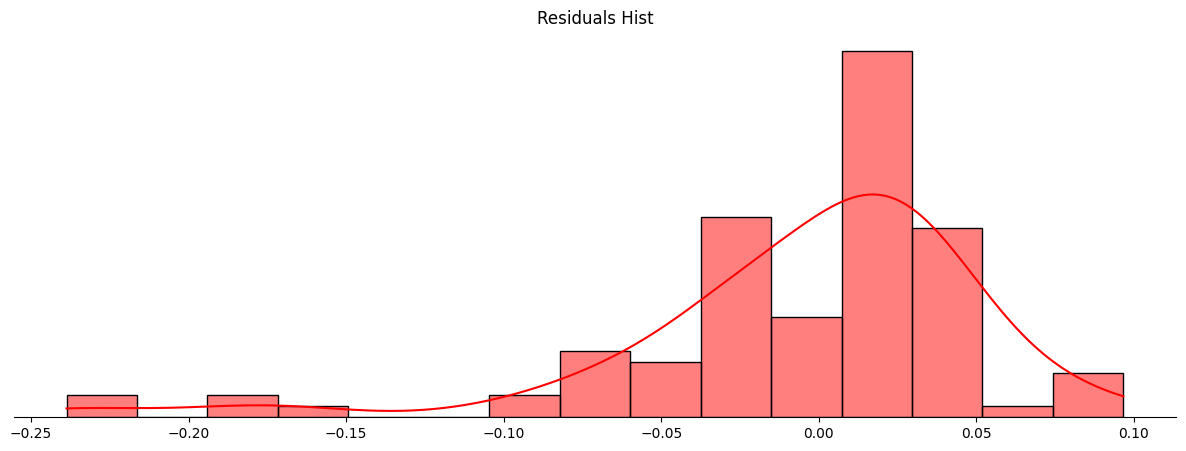

In [73]:
plt.figure(figsize=(15,5))
sns.histplot(residual, kde= True,color='r')
plt.title('Residuals Hist')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

<Figure size 1500x500 with 0 Axes>

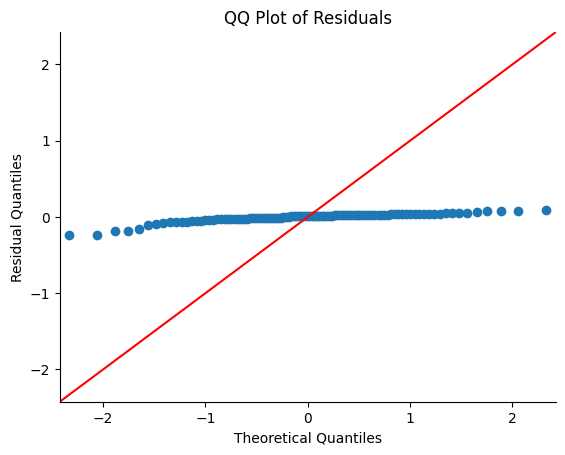

In [74]:
plt.figure(figsize=(15,5))
sm.qqplot(residual,line='45')
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
sns.despine()
plt.show()

## JARQUE BERA test:

In [76]:
jb_stat, jb_p_value = stats.jarque_bera(residual)
print("Jarque-Bera Test Statistic:", jb_stat)
print("p-value:", jb_p_value)
if jb_p_value < 0.05:
  print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
  print("Fail to reject the null hypothesis: Residuals are normally distributed.")

Jarque-Bera Test Statistic: 141.047369298608
p-value: 2.3547939607450728e-31
Reject the null hypothesis: Residuals are not normally distributed.


## INSIGHT
1. From Hisplot and Kdeplot we can say that Residuals are left skewed.
2. The QQ plot shows that residuals are slightly deviating from the straight diagonal , thus not Gaussian.
3. From Jarque Bera test , we conclude that the Residuals are Not Normally distributed.
Hence this assumption is not met.

## Lasso and Ridge Regression - L1 & L2 Regularization

## Lasso Regression:

In [77]:
from sklearn.linear_model import Lasso

In [78]:
model_lasso = Lasso(alpha=0.45)
model_lasso.fit(x_train, y_train)


Lasso(alpha=0.45)

In [80]:
from sklearn.linear_model import Ridge

In [81]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

Ridge()

In [82]:
y_pred_train_ridge = model_ridge.predict(x_train)
y_pred_test_ridge = model_ridge.predict(x_test)
y_pred_train_lasso = model_lasso.predict(x_train)
y_pred_test_lasso = model_lasso.predict(x_test)

In [83]:
lasso_model_weights = pd.DataFrame(model_lasso.coef_.reshape(1,-1),columns=jb.columns[:-1])
lasso_model_weights["Intercept"] = model_lasso.intercept_
lasso_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.720925


In [84]:
ridge_model_weights = pd.DataFrame(model_ridge.coef_.reshape(1,-1),columns=jb.columns[:-1])
ridge_model_weights["Intercept"] = model_ridge.intercept_
ridge_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020872,0.019405,0.007082,0.003122,0.013381,0.069874,0.00989,0.722884


In [86]:
print('Linear Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train, lr_model)
print('-'*25)
print('\nLinear Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test, lr_model)
print('---'*25)
print('\nRidge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_ridge, model_ridge)
print('-'*25)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_ridge, model_ridge)
print('---'*25)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_lasso, model_lasso)
print('-'*25)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values,y_pred_test_lasso, model_lasso)
print("---"*25)

Linear Regression Training Accuracy

MSE: 0.0
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82
-------------------------

Linear Regression Test Accuracy

MSE: 0.0
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------

Ridge Regression Training Accuracy

MSE: 0.0
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.82
-------------------------


Ridge Regression Test Accuracy

MSE: 0.0
MAE: 0.04
RMSE: 0.06
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------


Lasso Regression Training Accuracy

MSE: 0.02
MAE: 0.11
RMSE: 0.14
R2 Score: 0.0
Adjusted R2: -0.02
-------------------------


Lasso Regression Test Accuracy

MSE: 0.02
MAE: 0.11
RMSE: 0.14
R2 Score: -0.0
Adjusted R2: -0.08
---------------------------------------------------------------------------


Elastic Net Regression

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-87-ef3db91de282>, line 3)

In [89]:
from sklearn.linear_model import ElasticNet

In [90]:
ElasticNet_model = ElasticNet(alpha=0.108)
ElasticNet_model.fit(x_train , y_train)

ElasticNet(alpha=0.108)

In [91]:
y_pred_train_el = ElasticNet_model.predict(x_train)
y_pred_test_el = ElasticNet_model.predict(x_test)

In [92]:
train_R2 = ElasticNet_model.score(x_train,y_train)
test_R2 = ElasticNet_model.score(x_test,y_test)
train_R2 , test_R2

(0.6375056022782828, 0.622256551131287)

In [93]:
train_R2 = ElasticNet_model.score(x_train,y_train)
test_R2 = ElasticNet_model.score(x_test,y_test)
train_R2 , test_R2

(0.6375056022782828, 0.622256551131287)

In [94]:
en_model_weights = pd.DataFrame(ElasticNet_model.coef_.reshape(1,-1),columns=jb.columns[:-1])
en_model_weights["Intercept"] = ElasticNet_model.intercept_
en_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.010818,0.008736,0.0,0.0,0.0,0.051754,0.0,0.721952


In [95]:
print('ElasticNet Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_el, ElasticNet_model)
print('*'*25)
print('\nElasticNet Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_el, ElasticNet_model)
print('---'*25)

ElasticNet Regression Training Accuracy

MSE: 0.01
MAE: 0.07
RMSE: 0.09
R2 Score: 0.64
Adjusted R2: 0.63
*************************

ElasticNet Regression Test Accuracy

MSE: 0.01
MAE: 0.07
RMSE: 0.09
R2 Score: 0.62
Adjusted R2: 0.59
---------------------------------------------------------------------------


### Regression Analysis Summary:
1. By conducting regression analysis, it's evident that CGPA emerges as the most influential feature in predicting admission chances.
2. Additionally, GRE and TOEFL scores also holds significant importance.
3. Following the initial regression model, a thorough check for multicollinearity was performed, revealing VIF scores consistently below
5, indicative of low multicollinearity among predictors.
4. Despite the absence of high multicollinearity, it's noteworthy that the residuals do not conform perfectly to a normal distribution.
Furthermore, the residual plots indicate some level of heteroscedasticity.
5. After exploring involving regularized models such as Ridge and Lasso regression showed comparable results to the Linear
Regression Model.
6. Moreover, employing ElasticNet (L1+L2) regression yielded results consistent with the other regression models.
Recommendation
1. Encourage students to focus on improving GRE scores, CGPA, and Letters of Recommendation (LOR), as these factors influence a
lot your chances of admission.
2. Beyond academic metrics applicants can also add like extracurricular achievements, personal statements, and diversity factors.

3. We can enhance our predictive model by adding other important and diverse features like Work-experiece, internships or extra-
curriculum activites.